Chapter 1. The Machine Learning Landscape- bootcamp

loading the necessary libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.neighbors import KNeighborsRegressor


Loading the data set

In [3]:
data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

In [4]:
print("Dataset:")
print(lifesat)

Dataset:
           Country  GDP per capita (USD)  Life satisfaction
0           Russia          26456.387938                5.8
1           Greece          27287.083401                5.4
2           Turkey          28384.987785                5.5
3           Latvia          29932.493910                5.9
4          Hungary          31007.768407                5.6
5         Portugal          32181.154537                5.4
6           Poland          32238.157259                6.1
7          Estonia          35638.421351                5.7
8            Spain          36215.447591                6.3
9         Slovenia          36547.738956                5.9
10       Lithuania          36732.034744                5.9
11          Israel          38341.307570                7.2
12           Italy          38992.148381                6.0
13  United Kingdom          41627.129269                6.8
14          France          42025.617373                6.5
15     New Zealand          424

consists of three columns: "Country", "GDP per capita (USD)", and "Life satisfaction", with 27 rows representing different countries. Each row corresponds to a specific country and contains data on its GDP per capita and life satisfaction score.


In [5]:
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [6]:
print("Null values in the dataset:")
print(lifesat.isnull().sum())

Null values in the dataset:
Country                 0
GDP per capita (USD)    0
Life satisfaction       0
dtype: int64


no null values

In [7]:
from scipy import stats
lifesat_numeric = lifesat.select_dtypes(include=np.number)
z_scores = np.abs(stats.zscore(lifesat_numeric))
threshold = 3
outlier_indices = np.where(z_scores > threshold)
print("Indices of outliers:")
print(outlier_indices)


Indices of outliers:
(array([], dtype=int64), array([], dtype=int64))


no outliers


In [8]:
print("Descriptive Statistics:")
print(lifesat.describe())

Descriptive Statistics:
       GDP per capita (USD)  Life satisfaction
count             27.000000          27.000000
mean           41564.521771           6.566667
std             9631.452319           0.765607
min            26456.387938           5.400000
25%            33938.289305           5.900000
50%            41627.129269           6.800000
75%            49690.580269           7.300000
max            60235.728492           7.600000


On average, the GDP per capita is about **41,565 dollars**, with values ranging from approximately **26,456 dollars to 60,236 dollars**.


**The average life satisfaction score is around 6.57, with scores ranging from 5.4 to 7.6**.

Scatter plot showing the relationship between GDP per capita (USD) and Life satisfaction:


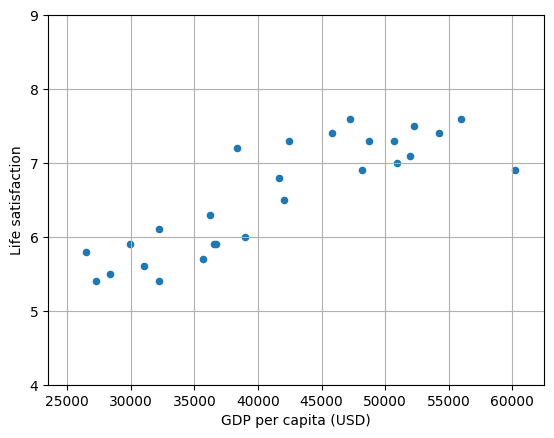

In [9]:
print("Scatter plot showing the relationship between GDP per capita (USD) and Life satisfaction:")
lifesat.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

**The scatter plot shows a positive correlation between GDP per capita and life satisfaction**.
 However, the  relationship is not perfectly linear, and there is some scatter around the trend line. This suggests that there are other factors besides GDP per capita that can influence life satisfaction.

linear regression model

In [10]:

model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [11]:
t0, t1 = model.intercept_[0], model.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


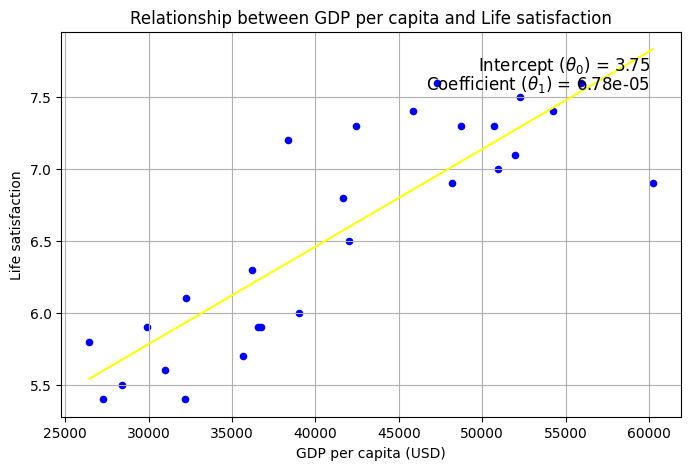

In [12]:
import matplotlib.pyplot as plt


lifesat.plot(kind='scatter', figsize=(8, 5), grid=True, x="GDP per capita (USD)", y="Life satisfaction", color='blue')

X = np.linspace(lifesat["GDP per capita (USD)"].min(), lifesat["GDP per capita (USD)"].max(), 1000)
Y = t0 + t1 * X
plt.plot(X, Y, color="yellow")
plt.text(0.95, 0.9, f"Intercept ($\\theta_0$) = {t0:.2f}", transform=plt.gca().transAxes, fontsize=12, ha='right', color='black')
plt.text(0.95, 0.85, f"Coefficient ($\\theta_1$) = {t1:.2e}", transform=plt.gca().transAxes, fontsize=12, ha='right', color='black')


plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Relationship between GDP per capita and Life satisfaction")

plt.show()

**additionalvisualisation **


Based on Figure 1-22. A more representative training sample

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


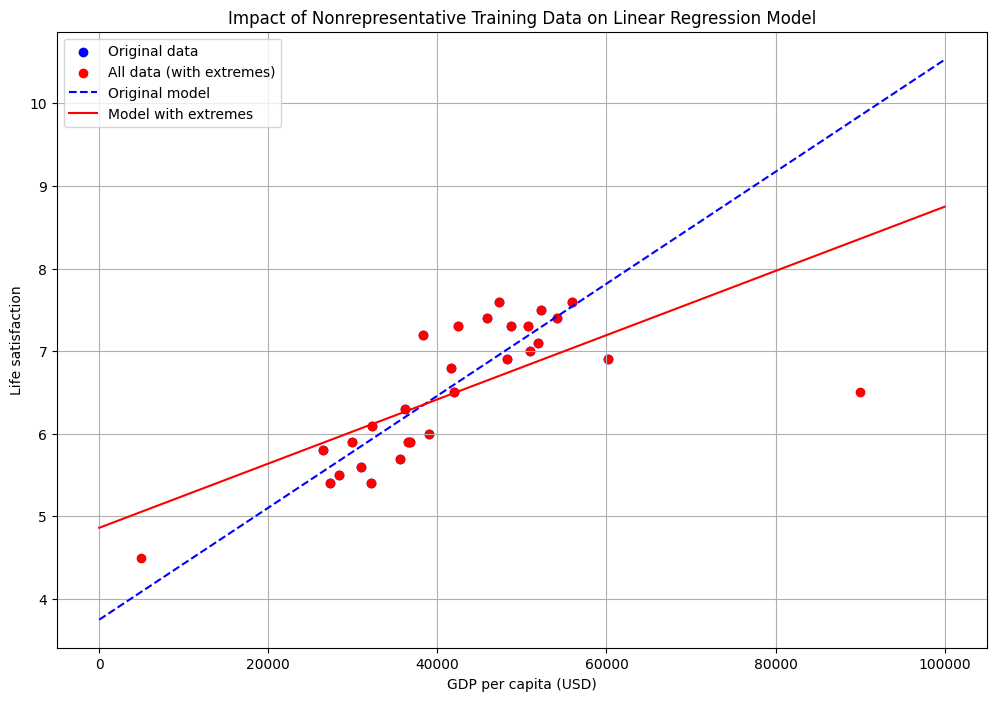

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


original_data = {
    'Country': ["Russia", "Greece", "Turkey", "Latvia", "Hungary", "Portugal", "Poland", "Estonia", "Spain",
                "Slovenia", "Lithuania", "Israel", "Italy", "United Kingdom", "France", "New Zealand",
                "Canada", "Finland", "Belgium", "Australia", "Sweden", "Germany", "Austria", "Iceland",
                "Netherlands", "Denmark", "United States"],
    'GDP per capita (USD)': [26456, 27287, 28385, 29932, 31008, 32181, 32238, 35638, 36215,
                             36548, 36732, 38341, 38992, 41627, 42026, 42404, 45856, 47260,
                             48210, 48698, 50683, 50922, 51936, 52280, 54209, 55938, 60236],
    'Life satisfaction': [5.8, 5.4, 5.5, 5.9, 5.6, 5.4, 6.1, 5.7, 6.3, 5.9, 5.9, 7.2, 6.0,
                          6.8, 6.5, 7.3, 7.4, 7.6, 6.9, 7.3, 7.3, 7.0, 7.1, 7.5, 7.4, 7.6, 6.9]
}


additional_data = {
    'Country': ["Poorland", "Wealthland"],
    'GDP per capita (USD)': [5000, 90000],
    'Life satisfaction': [4.5, 6.5]
}


all_data = {key: original_data[key] + additional_data[key] for key in original_data}


df_original = pd.DataFrame(original_data)
df_all = pd.DataFrame(all_data)


X_original = df_original[["GDP per capita (USD)"]]
y_original = df_original[["Life satisfaction"]]

X_all = df_all[["GDP per capita (USD)"]]
y_all = df_all[["Life satisfaction"]]


model_original = LinearRegression()
model_original.fit(X_original, y_original)

model_all = LinearRegression()
model_all.fit(X_all, y_all)


X_range = np.linspace(0, 100000, 1000).reshape(-1, 1)
y_pred_original = model_original.predict(X_range)
y_pred_all = model_all.predict(X_range)


plt.figure(figsize=(12, 8))
plt.scatter(X_original, y_original, color='blue', label='Original data')
plt.scatter(df_all["GDP per capita (USD)"], df_all["Life satisfaction"], color='red', label='All data (with extremes)')
plt.plot(X_range, y_pred_original, color='blue', linestyle='--', label='Original model')
plt.plot(X_range, y_pred_all, color='red', linestyle='-', label='Model with extremes')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Impact of Nonrepresentative Training Data on Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()


The plot shows the impact of nonrepresentative training data on a linear regression model.
The original data (blue points) cover GDP per capita between 23,500 and 62,500, resulting in a linear model (blue dashed line) that shows a steady increase in life satisfaction with GDP.


** Adding extreme GDP values (red points) significantly alters the model (red solid line), revealing that very high GDP per capita does not correspond to proportionally higher life satisfaction and may even decrease. This shows the importance of using a representative dataset for accurate modeling and good generalization.**

Ridge regression

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


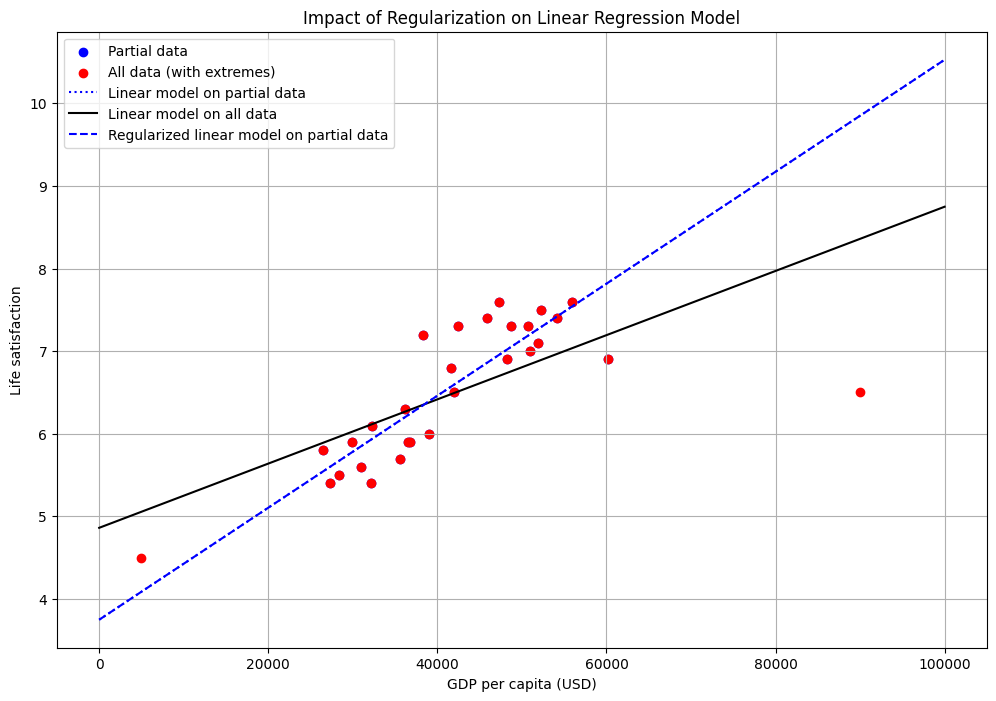

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge


data_root = "https://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

# Original dataset (partial data, without extreme()
partial_data = {
    'Country': ["Russia", "Greece", "Turkey", "Latvia", "Hungary", "Portugal", "Poland", "Estonia", "Spain",
                "Slovenia", "Lithuania", "Israel", "Italy", "United Kingdom", "France", "New Zealand",
                "Canada", "Finland", "Belgium", "Australia", "Sweden", "Germany", "Austria", "Iceland",
                "Netherlands", "Denmark", "United States"],
    'GDP per capita (USD)': [26456, 27287, 28384, 29932, 31007, 32181, 32238, 35638, 36215,
                             36547, 36732, 38341, 38992, 41627, 42025, 42404, 45856, 47260,
                             48210, 48697, 50683, 50922, 51935, 52279, 54209, 55938, 60235],
    'Life satisfaction': [5.8, 5.4, 5.5, 5.9, 5.6, 5.4, 6.1, 5.7, 6.3, 5.9, 5.9, 7.2, 6.0,
                          6.8, 6.5, 7.3, 7.4, 7.6, 6.9, 7.3, 7.3, 7.0, 7.1, 7.5, 7.4, 7.6, 6.9]
}

# Additional data (extreme GDP per capita values)
additional_data = {
    'Country': ["Poorland", "Wealthland"],
    'GDP per capita (USD)': [5000, 90000],
    'Life satisfaction': [4.5, 6.5]
}

# Combine partial data with additional data
all_data = {key: partial_data[key] + additional_data[key] for key in partial_data}

# Convert to DataFrames
df_partial = pd.DataFrame(partial_data)
df_all = pd.DataFrame(all_data)

#  for Prepare the data for linear regression
X_partial = df_partial[["GDP per capita (USD)"]]
y_partial = df_partial[["Life satisfaction"]]

X_all = df_all[["GDP per capita (USD)"]]
y_all = df_all[["Life satisfaction"]]

# Train linear regression models
model_partial = LinearRegression()
model_partial.fit(X_partial, y_partial)

model_all = LinearRegression()
model_all.fit(X_all, y_all)

# Train a regularized linear regression model (Ridge regression)
ridge_model = Ridge(alpha=1.0)  #The regularization is light. The model will be similar to standard linear regression, with a slight reduction in the magnitude of the coefficients.
ridge_model.fit(X_partial, y_partial)

# Make predictions
X_range = np.linspace(0, 100000, 1000).reshape(-1, 1)
y_pred_partial = model_partial.predict(X_range)
y_pred_all = model_all.predict(X_range)
y_pred_ridge = ridge_model.predict(X_range)

# Plot the results
plt.figure(figsize=(12, 8))
plt.scatter(X_partial, y_partial, color='blue', label='Partial data')
plt.scatter(df_all["GDP per capita (USD)"], df_all["Life satisfaction"], color='red', label='All data (with extremes)')
plt.plot(X_range, y_pred_partial, color='blue', linestyle=':', label='Linear model on partial data')
plt.plot(X_range, y_pred_all, color='black', linestyle='-', label='Linear model on all data')
plt.plot(X_range, y_pred_ridge, color='blue', linestyle='--', label='Regularized linear model on partial data')
plt.xlabel('GDP per capita (USD)')
plt.ylabel('Life satisfaction')
plt.title('Impact of Regularization on Linear Regression Model')
plt.legend()
plt.grid(True)
plt.show()


The plot shows:

Partial Data (Blue Points):

Blue Dotted Line: Linear model on partial data. High slope indicates a strong relationship between GDP per capita and life satisfaction.
All Data (Red Points):

Black Line: Linear model on all data (including extremes). Different slope due to the influence of extreme values.
Regularized Model (Blue Dashed Line):

Ridge regression on partial data. Smaller slope, indicating less sensitivity to training data, leading to better generalization.
Key Point: Regularization helps create a model that generalizes better to new data by reducing sensitivity to the training data.(0.1 is used)

In [16]:
pip install plotly geopandas


Interactive map:

Figure 1-23. Overfitting the training data




visualisation to show the overfitting

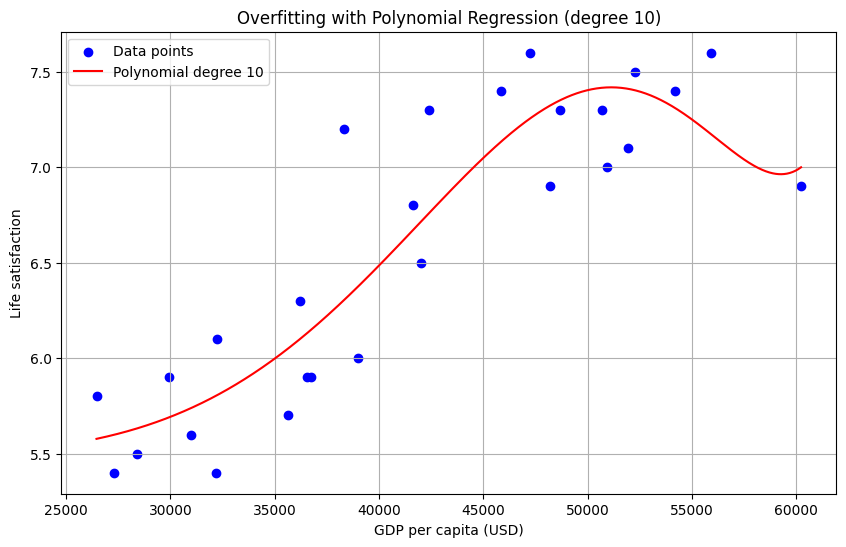

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


# Extract features (X) and target variable (y)
X = np.c_[lifesat["GDP per capita (USD)"]].reshape(-1, 1)
y = np.c_[lifesat["Life satisfaction"]].reshape(-1, 1)

# Create a high-degree polynomial regression model to show overfitting
degree = 10  # High-degree polynomial to demonstrate overfitting
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(X, y)

# Generate predictions for the training data
X_range = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
predictions = model.predict(X_range)

# Visualize the data points and the overfitting polynomial regression model
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_range, predictions, color='red', label=f'Polynomial degree {degree}')
plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title(f"Overfitting with Polynomial Regression (degree {degree})")
plt.legend()
plt.grid(True)
plt.show()


The plot shows how the high-degree polynomial model fits the training data very closely, capturing noise and fluctuations. This results in overfitting, where the model performs well on the training data but may not generalize well to new, unseen data.

conclusion based on the above analysis

The analysis confirms that there is a positive correlation between GDP per capita and life satisfaction.
 Countries with higher GDP per capita generally tend to have higher life satisfaction scores.
 However, this relationship is not perfectly linear, and higher GDP per capita does not solely determine life satisfaction. While GDP per capita is an important factor, it is not the only determinant of life satisfaction. Other factors such as healthcare, education, social support, and personal freedoms also play significant roles in determining overall life satisfaction. **Therefore, a balanced model considering these factors would better capture the true relationship between GDP per capita and life satisfaction**

---





part2:
using additional data provided in the github repo

the Better Life Index (BLI) data from OECD's website (to get the Life Satisfaction for each country), and World Bank GDP per capita data from OurWorldInData.org. The BLI data is in datasets/lifesat/oecd_bli.csv (data from 2020), and the GDP per capita data is in datasets/lifesat/gdp_per_capita.csv (data up to 2020).

loading the dataset

In [19]:
import os
import urllib.request
import pandas as pd
from pathlib import Path

# Define the data path
datapath = Path("/content/datasets/lifesat")
datapath.mkdir(parents=True, exist_ok=True)

# Define the data root URL
data_root = "https://github.com/ageron/data/raw/main/"

# Download the files
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath / filename).is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath / filename)

# Load the datasets
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

# Display the first few rows of the datasets
print("OECD BLI Dataset:")
print(oecd_bli.head())
print("\nGDP per Capita Dataset:")
print(gdp_per_capita.head())


OECD BLI Dataset:
  LOCATION         Country INDICATOR                 Indicator MEASURE  \
0      AUS       Australia   JE_LMIS  Labour market insecurity       L   
1      AUT         Austria   JE_LMIS  Labour market insecurity       L   
2      BEL         Belgium   JE_LMIS  Labour market insecurity       L   
3      CAN          Canada   JE_LMIS  Labour market insecurity       L   
4      CZE  Czech Republic   JE_LMIS  Labour market insecurity       L   

  Measure INEQUALITY Inequality Unit Code        Unit  PowerCode Code  \
0   Value        TOT      Total        PC  Percentage               0   
1   Value        TOT      Total        PC  Percentage               0   
2   Value        TOT      Total        PC  Percentage               0   
3   Value        TOT      Total        PC  Percentage               0   
4   Value        TOT      Total        PC  Percentage               0   

  PowerCode  Reference Period Code  Reference Period  Value  Flag Codes  Flags  
0     Units      

In [20]:
print("OECD BLI Dataset Column Names:")
print(oecd_bli.columns)
print("\nGDP per Capita Dataset Column Names:")
print(gdp_per_capita.columns)

OECD BLI Dataset Column Names:
Index(['LOCATION', 'Country', 'INDICATOR', 'Indicator', 'MEASURE', 'Measure',
       'INEQUALITY', 'Inequality', 'Unit Code', 'Unit', 'PowerCode Code',
       'PowerCode', 'Reference Period Code', 'Reference Period', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

GDP per Capita Dataset Column Names:
Index(['Entity', 'Code', 'Year',
       'GDP per capita, PPP (constant 2017 international $)'],
      dtype='object')


In [21]:
gdp_year = 2020
gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [22]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


the below code Merges two datasets (oecd_bli and gdp_per_capita) based on their indices.
Sorts the merged DataFrame by the GDP per capita column.
Selects only the GDP per capita and life satisfaction columns for the final DataFrame.
Displays the first five rows of the resulting DataFrame.

In [23]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdppc_col, inplace=True)
full_country_stats = full_country_stats[[gdppc_col, lifesat_col]]

full_country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [24]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats[gdppc_col] >= min_gdp) &
                                   (full_country_stats[gdppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [25]:
country_stats.to_csv(datapath / "lifesat.csv")
full_country_stats.to_csv(datapath / "lifesat_full.csv")

The code plots GDP per capita against life satisfaction, annotates specific countries with arrows and labels, sets the axis limits, saves the plot as an image, and displays it.

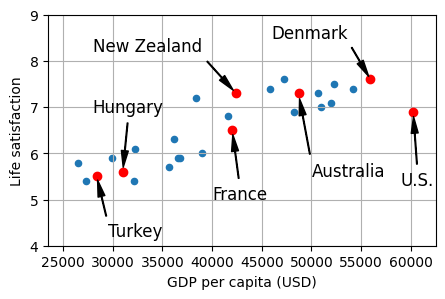

In [26]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29_500, 4.2),
    "Hungary": (28_000, 6.9),
    "France": (40_000, 5),
    "New Zealand": (28_000, 8.2),
    "Australia": (50_000, 5.5),
    "United States": (59_000, 5.3),
    "Denmark": (46_000, 8.5)
}

for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
# Save the figure using plt.savefig
plt.savefig('money_happy_scatterplot.png')

# Show the plot
plt.show()

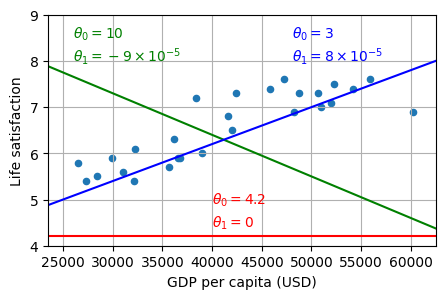

In [27]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2 = 4.2, 0
plt.plot(X, w1 + w2 * 1e-5 * X, "r")
plt.text(40_000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40_000, 4.4, fr"$\theta_1 = {w2}$", color="r")

w1, w2 = 10, -9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26_000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1, w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48_000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48_000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

# Save the figure using plt.savefig
plt.savefig('money_happy_scatterplot.png')

# Show the plot
plt.show()

Scatter Plot: Visualizes the relationship between GDP per capita and life satisfaction.
Linear Models: Three different linear models are plotted with different parameters:
Red Line: Intercept = 4.2, Slope = 0 (flat line).
Green Line: Intercept = 10, Slope = -9 × 10^-5 (downward slope).
Blue Line: Intercept = 3, Slope = 8 × 10^-5 (upward slope).
Annotations: Each line is annotated with its parameters.
Axes Limits: Set based on min_gdp, max_gdp, min_life_sat, and max_life_sat.
Save and Show: Saves the plot as tweaking_model_params_plot.png and displays it.

General Trend: The scatter plot shows a general positive correlation between GDP per capita and life satisfaction. As GDP per capita increases, life satisfaction generally increases.
Model Comparisons:
Red Line: Represents a model with no relationship between GDP per capita and life satisfaction, which doesn't fit the data well.
Green Line: Represents a model suggesting a negative relationship, which contradicts the observed trend.
Blue Line: Represents a model suggesting a positive relationship, which aligns with the observed trend.

In [28]:
from sklearn import linear_model

X_sample = country_stats[[gdppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = linear_model.LinearRegression()
lin1.fit(X_sample, y_sample)

t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
print(f"θ0={t0:.2f}, θ1={t1:.2e}")

θ0=3.75, θ1=6.78e-05


The intercept
𝜃
0
=
3.75
θ
0
​
 =3.75 provides the baseline life satisfaction score.
The slope
𝜃
1
=
6.78
×
1
0
−
5
θ
1
​
 =6.78×10
−5
  indicates that life satisfaction increases slightly with each dollar increase in GDP per capita.
Together, they define a linear relationship between GDP per capita and life satisfaction, suggesting a positive but gradual increase in life satisfaction as GDP per capita increases.

**Instead of cyprus , i have taken algeria**

In [29]:
Algeria_gdp_per_capita = gdp_per_capita[gdppc_col].loc["Algeria"]
Algeria_gdp_per_capita

10681.6792969827

In [30]:
Algeria_predicted_life_satisfaction = lin1.predict([[Algeria_gdp_per_capita]])[0, 0]
Algeria_predicted_life_satisfaction

4.4731497525905795

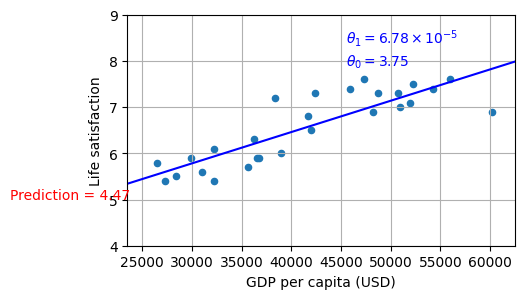

In [31]:
country_stats.plot(kind='scatter', figsize=(5, 3), grid=True,
                   x=gdppc_col, y=lifesat_col)

X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 + t1 * X, "b")

plt.text(min_gdp + 22_000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp + 22_000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([Algeria_gdp_per_capita, Algeria_gdp_per_capita],
         [min_life_sat, Algeria_predicted_life_satisfaction], "r--")
plt.text(Algeria_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {Algeria_predicted_life_satisfaction:.2f}", color="r")
plt.plot(Algeria_gdp_per_capita, Algeria_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])

plt.show()

for algeria,the prediction is 4.47

In [32]:
missing_data = full_country_stats[(full_country_stats[gdppc_col] < min_gdp) |
                                  (full_country_stats[gdppc_col] > max_gdp)]
missing_data
position_text_missing_countries = {
    "South Africa": (20_000, 4.2),
    "Colombia": (6_000, 8.2),
    "Brazil": (18_000, 7.8),
    "Mexico": (24_000, 7.4),
    "Chile": (30_000, 7.0),
    "Norway": (51_000, 6.2),
    "Switzerland": (62_000, 5.7),
    "Ireland": (81_000, 5.2),
    "Luxembourg": (92_000, 4.7),
}

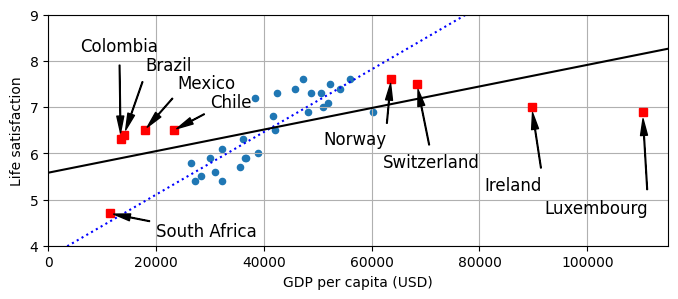

In [33]:
full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor='black', width=0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0 + t1 * X, "b:")

lin_reg_full = linear_model.LinearRegression()
Xfull = np.c_[full_country_stats[gdppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115_000, 1000)
plt.plot(X, t0full + t1full * X, "k")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save the figure using plt.savefig
plt.savefig('representative_training_data_scatterplot.png')

# Show the plot
plt.show()

plot showing the relationship between GDP per capita and life satisfaction, including missing data annotations in red dots

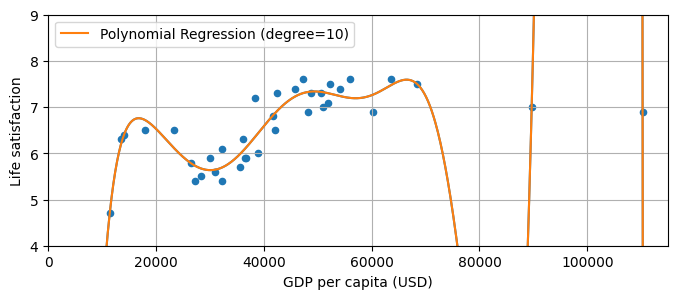

In [34]:
from sklearn import preprocessing
from sklearn import pipeline

full_country_stats.plot(kind='scatter', figsize=(8, 3),
                        x=gdppc_col, y=lifesat_col, grid=True)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([
    ('poly', poly),
    ('scal', scaler),
    ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
# Plot the polynomial regression curve
plt.plot(X, curve, label="Polynomial Regression (degree=10)")

# Set plot limits
plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Add legend
plt.legend()

# Save the figure using plt.savefig
plt.savefig('overfitting_model_plot.png')

# Show the plot
plt.show()



The scatter plot shows the relationship between GDP per capita and life satisfaction for a few countries.
The polynomial regression curve of degree 10 is overly complex and demonstrates overfitting.

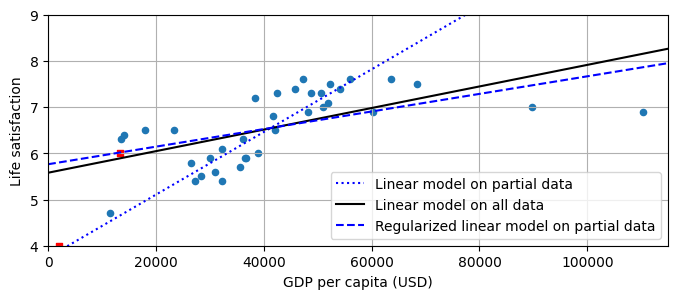

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


gdppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"

# Merge the datasets
country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)

# Define axis limits
min_life_sat = 4
max_life_sat = 9

# Fit linear models
Xfull = np.c_[country_stats[gdppc_col]]
yfull = np.c_[country_stats[lifesat_col]]
lin_reg_full = linear_model.LinearRegression()
lin_reg_full.fit(Xfull, yfull)
t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]

# Define the X range for plotting
X = np.linspace(0, 115_000, 1000)

# Linear model parameters (pre-defined)
t0 = 3.75
t1 = 6.78e-05

# Prepare missing data DataFrame
missing_data = pd.DataFrame({
    "GDP per capita (USD)": [1978.961579, 13295.410885],
    "Life satisfaction": [4.0, 6.0]
}, index=["Afghanistan", "Albania"])

# Plotting
country_stats.plot(kind='scatter', x=gdppc_col, y=lifesat_col, figsize=(8, 3))
missing_data.plot(kind='scatter', x=gdppc_col, y=lifesat_col, marker="s", color="r", grid=True, ax=plt.gca())

plt.plot(X, t0 + t1 * X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

# Ridge regression
ridge = linear_model.Ridge(alpha=10**9.5)
X_sample = country_stats[[gdppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--", label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115_000, min_life_sat, max_life_sat])

# Save the figure using plt.savefig
plt.savefig('ridge_model_plot.png')

# Show the plot
plt.show()


The solid black line is considered the most reliable as it uses all the data.
The blue dotted line overestimates the relationship due to using only partial data.
The blue dashed line (regularized model) provides a more balanced fit compared to the unregularized model on partial data, indicating that regularization helps in mitigating overfitting.
Overall, the plot demonstrates how different regression models (with and without regularization) and data subsets affect the interpretation of the relationship between GDP per capita and life satisfaction.

Additional analysis


Conclusion: There is a statistically significant relationship between GDP per capita and Life satisfaction.

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



# Define features and target variable
X = lifesat[["GDP per capita (USD)"]]
y = lifesat["Life satisfaction"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Random Forest Regressor Performance:")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")


Random Forest Regressor Performance:
Train MSE: 0.020683809523809323
Test MSE: 0.30907100000000304
Train R-squared: 0.9677911016949156
Test R-squared: -0.07815465116280129


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.14902e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=4.61459e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=6.72574e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=7.52858e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=3.78406e-24): result may not be accurate.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning:

Ill-conditioned matrix (rcond=5.5046e-24): result may not be accurate.



Cross-validation R-squared scores: [0.86733551 0.78325558 0.80694151 0.74987228 0.76864993]
Mean cross-validation R-squared score: 0.795210962862153
Ridge Regression Performance:
Train MSE: 0.07395226121601074
Test MSE: 0.21327955696707648
Train R-squared: 0.8848412881487968
Test R-squared: 0.2560015454636867


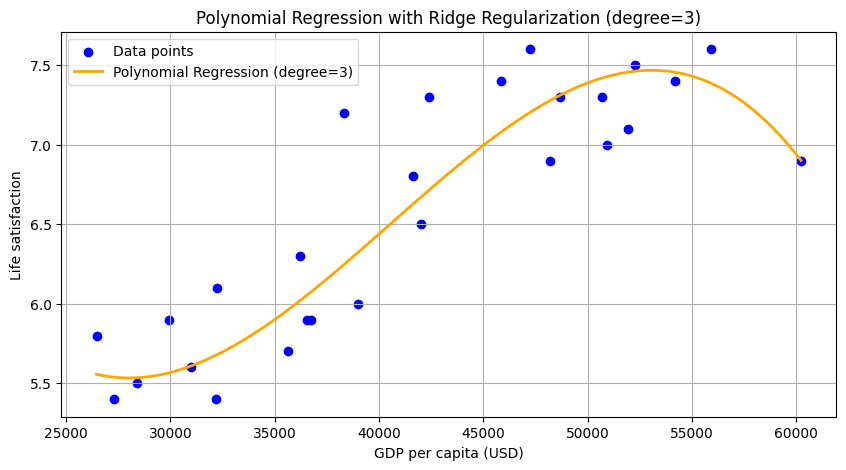

In [40]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Define features and target variable
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat["Life satisfaction"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Polynomial Features of degree 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Initialize Ridge Regression with regularization
ridge_reg = Ridge(alpha=1.0)

# Train the model
ridge_reg.fit(X_train_poly, y_train)

# Cross-validation scores
cv_scores = cross_val_score(ridge_reg, X_train_poly, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", cv_scores)
print("Mean cross-validation R-squared score:", np.mean(cv_scores))

# Make predictions
y_pred_train = ridge_reg.predict(X_train_poly)
y_pred_test = ridge_reg.predict(X_test_poly)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print("Ridge Regression Performance:")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train R-squared: {train_r2}")
print(f"Test R-squared: {test_r2}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Data points')

# Plot predictions
X_fit = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
X_fit_poly = poly_features.transform(X_fit)
y_fit = ridge_reg.predict(X_fit_poly)
plt.plot(X_fit, y_fit, color='orange', linewidth=2, label='Polynomial Regression (degree=3)')

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Polynomial Regression with Ridge Regularization (degree=3)")
plt.legend()
plt.grid(True)
plt.show()


Best parameters found:  {'poly_features__degree': 4, 'ridge__alpha': 0.1}
Test MSE: 0.2025721529439265
Test R-squared: 0.29335295484676804


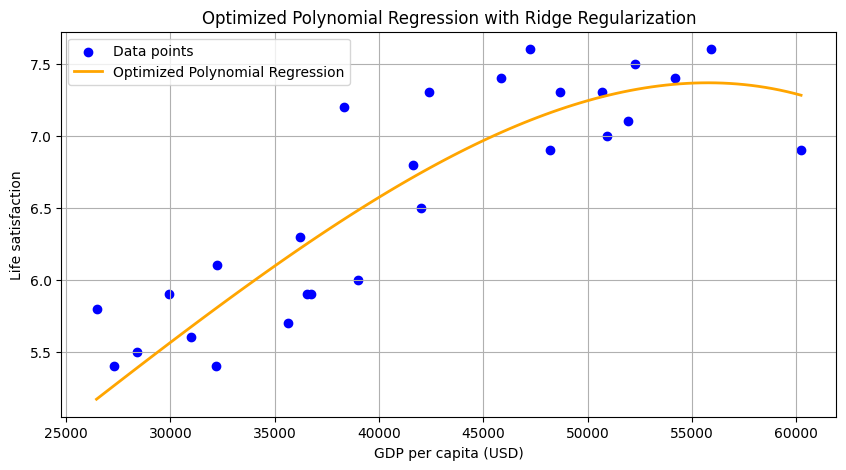

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the parameter grid for Ridge and polynomial degree
param_grid = {
    'poly_features__degree': [2, 3, 4],
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Create a pipeline that includes polynomial features and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(include_bias=False)),
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")

# Plot the results
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='blue', label='Data points')

# Plot predictions
X_fit = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
y_fit = best_model.predict(X_fit)
plt.plot(X_fit, y_fit, color='orange', linewidth=2, label='Optimized Polynomial Regression')

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Optimized Polynomial Regression with Ridge Regularization")
plt.legend()
plt.grid(True)
plt.show()


Test R-squared: Improved to 0.293, indicating a better fit compared to the previous model with an R-squared of 0.256.
Test MSE: Reduced to 0.203, indicating lower prediction error.

In [42]:
import plotly.graph_objects as go


fig = go.Figure(go.Choropleth(
    locations = lifesat['Country'],
    z = lifesat['GDP per capita (USD)'],
    locationmode = 'country names',
    colorscale = 'rainbow',
    colorbar_title = 'GDP per capita (USD)'
))


fig.update_layout(
    title_text = 'GDP per capita by Country',
    geo=dict(
        showcoastlines=True,
    )
)


fig.show()


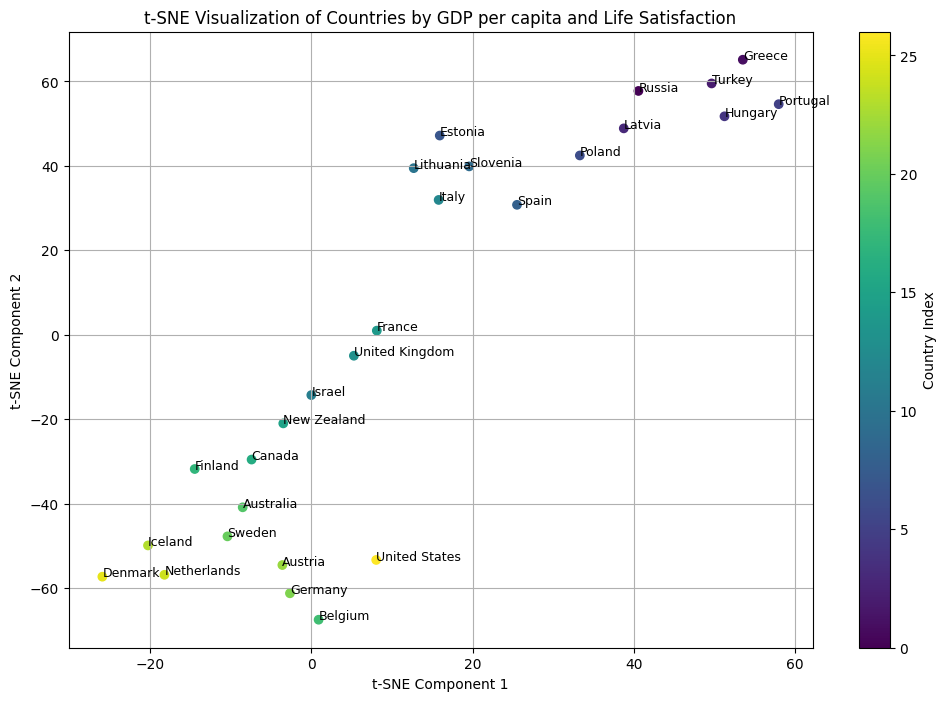

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler



X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values


X_reshaped = X.reshape(-1, 1)
y_reshaped = y.reshape(-1, 1)


combined_data = np.hstack((X_reshaped, y_reshaped))


scaler = StandardScaler()
combined_data_scaled = scaler.fit_transform(combined_data)


tsne = TSNE(n_components=2, perplexity=5, random_state=42)
X_tsne = tsne.fit_transform(combined_data_scaled)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.arange(len(X_tsne)), cmap='viridis', marker='o')


for i, country in enumerate(lifesat['Country']):
    plt.annotate(country, (X_tsne[i, 0], X_tsne[i, 1]), fontsize=9)


plt.colorbar(scatter, label='Country Index')


plt.title('t-SNE Visualization of Countries by GDP per capita and Life Satisfaction')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()


Linear Regression Performance:
Train MSE: 0.1468212813023761
Test MSE: 0.19546766227160994
Train R-squared: 0.7713694030566813
Test R-squared: 0.3181360618432211

Support Vector Regression Performance:
Train MSE: 0.009837639508928533
Test MSE: 0.2930666666666664
Train R-squared: 0.984680794408766
Test R-squared: -0.022325581395348015

Decision Tree Performance:
Train MSE: 0.0
Test MSE: 0.32333333333333325
Train R-squared: 1.0
Test R-squared: -0.12790697674418583

Random Forest Performance:
Train MSE: 0.020683809523809323
Test MSE: 0.30907100000000304
Train R-squared: 0.9677911016949156
Test R-squared: -0.07815465116280129

Gradient Boosting Performance:
Train MSE: 8.734856101584708e-05
Test MSE: 0.32206106917130495
Train R-squared: 0.9998639805246893
Test R-squared: -0.12346884594641261



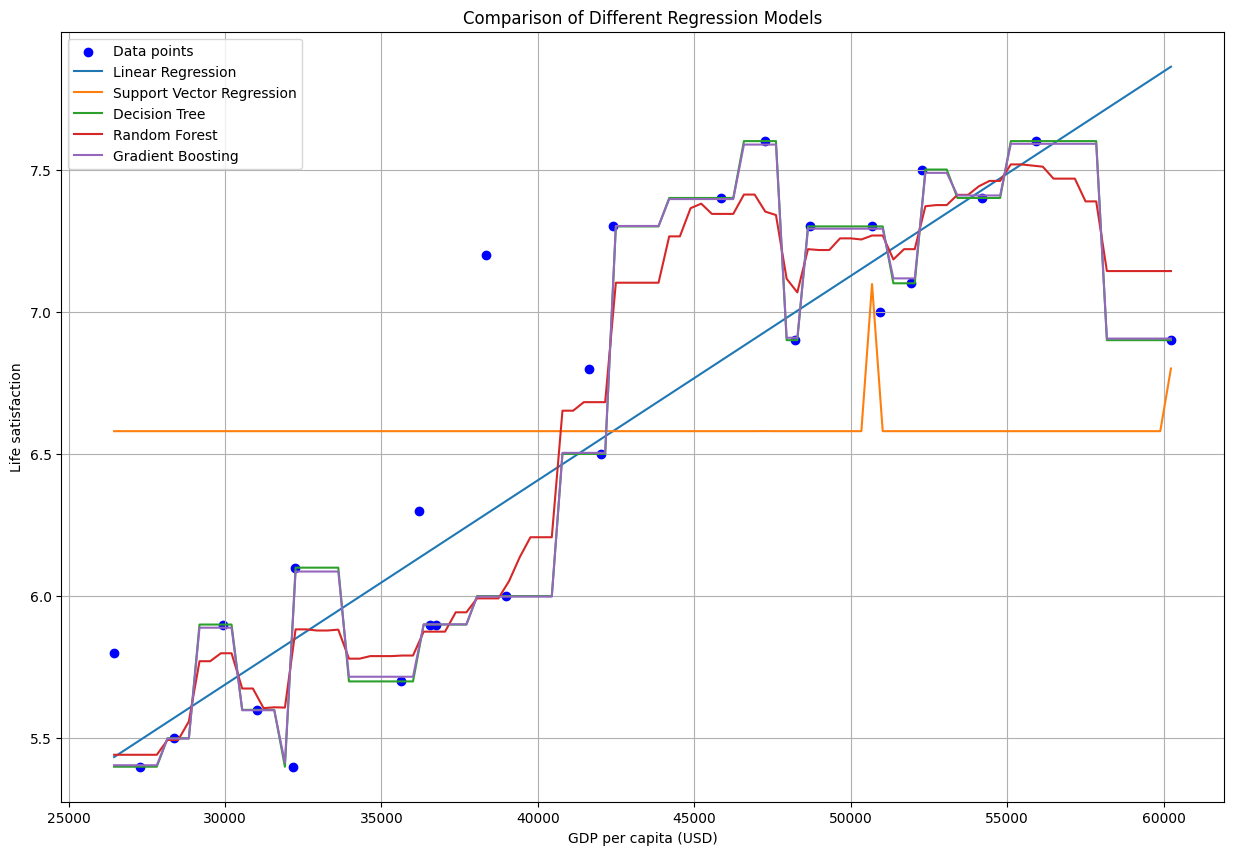

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target variable
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat["Life satisfaction"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}

results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate the model
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)

    results[name] = {
        "Train MSE": train_mse,
        "Test MSE": test_mse,
        "Train R-squared": train_r2,
        "Test R-squared": test_r2
    }

    print(f"{name} Performance:")
    print(f"Train MSE: {train_mse}")
    print(f"Test MSE: {test_mse}")
    print(f"Train R-squared: {train_r2}")
    print(f"Test R-squared: {test_r2}\n")

# Plot the results
plt.figure(figsize=(15, 10))
plt.scatter(X, y, color='blue', label='Data points')

# Plot predictions
X_fit = np.linspace(X.min(), X.max(), 100).reshape(100, 1)

for name, model in models.items():
    y_fit = model.predict(X_fit)
    plt.plot(X_fit, y_fit, label=name)

plt.xlabel("GDP per capita (USD)")
plt.ylabel("Life satisfaction")
plt.title("Comparison of Different Regression Models")
plt.legend()
plt.grid(True)
plt.show()


Linear Regression:
Train R²: 0.771, Test R²: 0.318 - Good fit on training, moderate on test.
Support Vector Regression:
Train R²: 0.985, Test R²: -0.022 - Overfits training data, poor generalization.
Decision Tree:
Train R²: 1.0, Test R²: -0.128 - Severe overfitting, poor generalization.
Random Forest:
Train R²: 0.968, Test R²: -0.078 - Overfits training data, poor generalization.
Gradient Boosting:
Train R²: 1.0, Test R²: -0.123 - Severe overfitting, poor generalization.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline


X = lifesat[["GDP per capita (USD)"]].values
y = lifesat["Life satisfaction"].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a pipeline with feature scaling and selection
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=f_regression, k='all'))
])

# Fit and transform the training data
X_train_scaled = pipeline.fit_transform(X_train, y_train)
X_test_scaled = pipeline.transform(X_test)


In [50]:
# Linear Regression as a baseline
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred_test = linear_reg.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Linear Regression Performance:")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")


Linear Regression Performance:
Test MSE: 0.19546766227160994
Test R-squared: 0.3181360618432211


In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test, y_pred_test)
test_r2 = r2_score(y_test, y_pred_test)

print("Gradient Boosting Performance:")
print(f"Test MSE: {test_mse}")
print(f"Test R-squared: {test_r2}")


Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Gradient Boosting Performance:
Test MSE: 0.2670064890493054
Test R-squared: 0.06858201494428351
